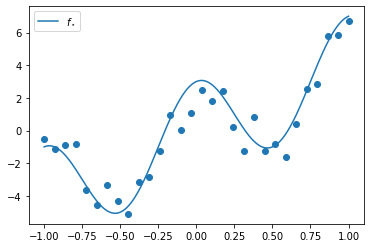

In [226]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
f_star = lambda x: 4*x + 3*np.cos(2*np.pi*x)
#f_star = lambda x: - 2*x**5 + 2*x**3 + 3*x
x = np.linspace(-1,1,30)
x_test = np.linspace(-1,1,1000)
f_star_x = f_star(x)
f_star_x_test = f_star(x_test)
y = f_star_x+np.random.normal(size=len(x))
plt.scatter(x, y)
plt.plot(x_test, f_star_x_test, label=r"$f_\star$")
plt.legend()
plt.show()


In [227]:
def fit_mp(X, y):
    y = y.reshape(-1, 1)
    return np.linalg.pinv(X)@y

def fit_ridge(X, y, lamb=0.05):
    y = y.reshape(-1,1)
    return np.linalg.inv(X.T@X + lamb*np.eye(X.shape[1]))@X.T@y

In [228]:
def polynomial_features(x, p):
    x = x.reshape(-1,1)
    return np.hstack([x**j for j in range(p+1)])

In [229]:

errors_mp = []
errors_ridge = []
p_range = range(1,40,1)
f_star_x_test = f_star(x_test)

for p in p_range:
    Xp = polynomial_features(x, p)
    beta_mp = fit_mp(Xp, y)
    beta_ridge = fit_ridge(Xp, y)

    Xp_test = polynomial_features(x_test, p)
    y_hat_mp = Xp_test@beta_mp
    y_hat_ridge = Xp_test@beta_ridge
    errors_mp.append(np.mean((y_hat_mp-f_star_x_test)**2))
    errors_ridge.append(np.mean((y_hat_ridge-f_star_x_test)**2))


# plt.plot(p_range, errors_mp, label="MP", marker='o')
# #plt.plot(p_range, errors_ridge, label="Ridge", marker='o')
# plt.legend()
# plt.show()

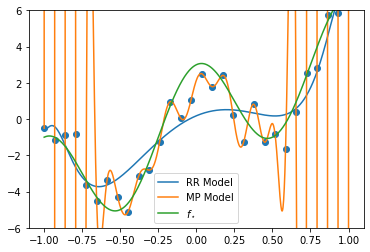

In [230]:
plt.scatter(x, y)
plt.plot(x_test, y_hat_ridge, label="RR Model")
plt.plot(x_test, y_hat_mp, label="MP Model")
plt.plot(x_test, f_star_x_test, label=f"$f_\star$")
plt.ylim(-6,6)
plt.legend()
plt.show()

In [160]:
np.random.uniform(-1,1,size=30)

array([ 0.0940047 , -0.91706898,  0.10725443, -0.66437238,  0.33130319,
       -0.59716535,  0.96205974,  0.59818495, -0.37462348, -0.99623002,
        0.20463762, -0.9722152 ,  0.00457861,  0.64180038, -0.56791503,
        0.19249942, -0.83231125,  0.73620171,  0.19186737, -0.49753362,
        0.40633524,  0.05248195, -0.87806334,  0.94028445,  0.17681184,
       -0.60629214, -0.58658904,  0.02303541,  0.33005502, -0.89473197])

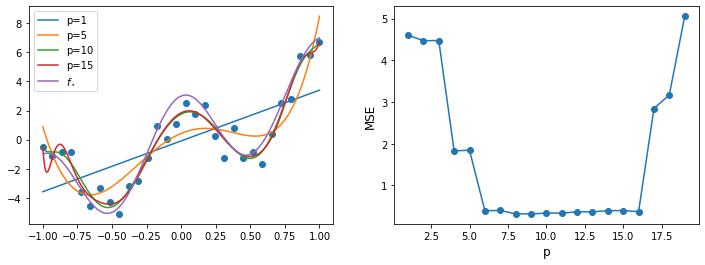

In [232]:
fig, axs = plt.subplots(1,2, figsize=(12,4))
p_range = range(1,20,1) 

mses = []
for p in p_range:
    Xp = polynomial_features(x, p=p) # generate feature matrix
    beta_hat = np.linalg.inv(Xp.T@Xp)@Xp.T@y # get OLS coefficients

    # make predictions on test samples to compare the fitted function
    Xp_test = polynomial_features(x_test, p=p)
    y_hat_test = Xp_test@beta_hat
    mses.append(np.mean((y_hat_test - f_star(x_test))**2))
    if p in [1,5,10,15]:
        axs[0].plot(x_test, y_hat_test, label=f"p={p}")

axs[0].scatter(x, y)
axs[0].plot(x_test, f_star(x_test), label=r"$f_\star$")
axs[0].legend()

axs[1].plot(p_range, mses, marker='o')
axs[1].set_xlabel("p", fontsize=12)
axs[1].set_ylabel("MSE", fontsize=12)
plt.show()

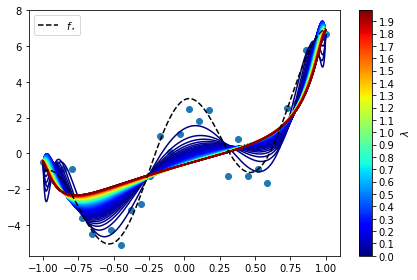

In [233]:
import matplotlib as mpl

lamb_range = np.arange(0.001, 2, 0.01) 

# get a colormap to represent the lambda values
c = np.arange(1, len(lamb_range) + 1)
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=mpl.cm.jet)
cmap.set_array([])

p=50
mses = []
for ix, lamb in enumerate(lamb_range):
    Xp = polynomial_features(x, p=p) # generate feature matrix
    beta_hat = np.linalg.inv(Xp.T@Xp + lamb*np.eye(Xp.shape[1]))@Xp.T@y # get RR coefficients

    # make predictions on test samples to compare the fitted function
    Xp_test = polynomial_features(x_test, p=p)
    y_hat_test = Xp_test@beta_hat
    mses.append(np.mean((y_hat_test - f_star(x_test))**2))
    plt.plot(x_test, y_hat_test, c=cmap.to_rgba(ix + 1))

cbar = plt.colorbar(cmap, ticks=range(1,len(lamb_range)+1, 10), label="$\lambda$")
cbar.ax.set_yticklabels([round(l,2) for l in lamb_range[::10]])
plt.scatter(x, y)
plt.plot(x_test, f_star(x_test), label=r"$f_\star$", color="black", linestyle="--")
plt.legend()
plt.tight_layout()
plt.show()

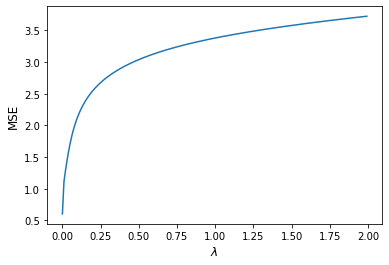

In [234]:
plt.plot(lamb_range, mses)
plt.xlabel("$\lambda$", fontsize=12)
plt.ylabel("MSE", fontsize=12)
plt.show()

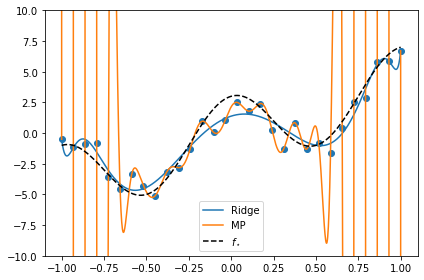

In [235]:
lamb = 0.001
Xp = polynomial_features(x, p=p) # generate feature matrix
beta_hat_RR = np.linalg.inv(Xp.T@Xp + lamb*np.eye(Xp.shape[1]))@Xp.T@y # get RR coefficients
beta_hat_MP = np.linalg.pinv(Xp)@y
# make predictions on test samples to compare the fitted function
Xp_test = polynomial_features(x_test, p=p)
y_hat_test_RR = Xp_test@beta_hat_RR
y_hat_test_MP = Xp_test@beta_hat_MP

plt.scatter(x, y)
plt.plot(x_test, y_hat_test_RR, label="Ridge")
plt.plot(x_test, y_hat_test_MP, label="MP")
plt.plot(x_test, f_star(x_test), label=r"$f_\star$", color="black", linestyle="--")
plt.ylim(-10,10)
plt.legend()
plt.tight_layout()
plt.show()

In [237]:
import pickle 

with open('datasets/EGFR_bioactivity.pkl', 'rb') as f:
    data = pickle.load(f)
    
X = data["X"]
y = data["y"]
X.shape, y.shape

((2000, 512), (2000,))

In [238]:
def fit_krr(K, y, lamb):
    return np.linalg.inv(K+lamb*np.eye(K.shape[0]))@y

In [239]:
def k_jaccard(X, Y=None):
    if Y is None:
        Y = X
    prod = np.dot(X, Y.T)
    norm_X = (np.linalg.norm(X, axis=1)**2).reshape(-1,1)
    norm_Y = (np.linalg.norm(Y, axis=1)**2).reshape(-1,1)
    return prod / (norm_X + norm_Y.T - prod)

def k_linear(X, Y=None):
    if Y is None:
        Y = X
    return np.dot(X, Y.T)

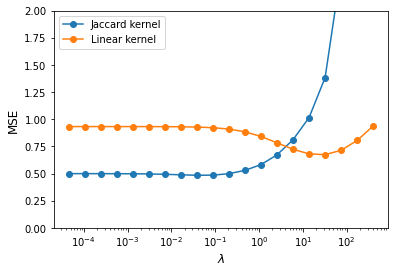

In [251]:
train_ix = np.random.choice(X.shape[0], 1800, replace=False)
test_ix = [j for j in range(X.shape[0]) if j not in train_ix]
X_train, y_train = X[train_ix], y[train_ix]
X_test, y_test = X[test_ix], y[test_ix]

lamb_range = np.exp(np.linspace(-10,6,20))

K_jaccard_train = k_jaccard(X_train)
K_jaccard_test = k_jaccard(X_test, X_train)
K_linear_train = k_linear(X_train)
K_linear_test = k_linear(X_test, X_train)
mses_jaccard = []
mses_linear = []

for lamb in lamb_range:
    alpha_hat_jaccard = fit_krr(K_jaccard_train, y_train, lamb)
    alpha_hat_linear = fit_krr(K_linear_train, y_train, lamb)
    y_hat_jaccard = K_jaccard_test@alpha_hat_jaccard 
    y_hat_linear = K_linear_test@alpha_hat_linear
    mses_jaccard.append(np.mean((y_test-y_hat_jaccard)**2))
    mses_linear.append(np.mean((y_test-y_hat_linear)**2))

plt.plot(lamb_range, mses_jaccard, label="Jaccard kernel", marker='o')
plt.plot(lamb_range, mses_linear, label="Linear kernel", marker='o')
plt.legend()
plt.ylabel("MSE", fontsize=14)
plt.xlabel("$\lambda$", fontsize=14)
plt.xscale("log")
plt.ylim(0,2)
plt.show()



In [57]:
import numpy as np

def logit(z):
    """
    logistic function
    """
    return 1./(1+np.exp(-z))

def grad_l(X, y, beta):
    """
    computes gradient of logistic negative log likelihood
    """
    return np.dot(X.T, logit(np.dot(X, beta)) - y)

def hess_l(X, y, beta):
    """
    computes Hessian of logistic negative log likelihood
    """
    # make W = diag(p(x_1; beta),...,p(x_n; beta))
    W = np.diag(logit(np.dot(X,beta)))
    return X.T@W@X
 
def fit_logistic_newton(X, y, eps=1e-3):
    """
    run Newton's method until gradient norm is sufficiently small
    """
    # randomly intialize beta
    beta = np.zeros(X.shape[1])#random.normal(size=X.shape[1])
    grad_norm = eps+1
    # continue as long as gradient norm is larger than threshold eps
    while grad_norm > eps:
        print(f"gradient norm = {grad_norm}")
        beta -= np.dot(np.linalg.inv(hess_l(X, y, beta)), grad_l(X, y, beta))
        grad_norm = np.linalg.norm(grad_l(X, y, beta))
    return beta


In [58]:
fit_logistic_newton(X_train, y_train)

gradient norm = 1.001
gradient norm = 436.9866177784243
gradient norm = 565.1725693096125
gradient norm = 653.4993067537474
gradient norm = 668.2829471873757
gradient norm = 636.1355449109537
gradient norm = 586.964816825239
gradient norm = 536.7890945102093
gradient norm = 491.3123134487815
gradient norm = 451.69822397758963
gradient norm = 417.5510425082983
gradient norm = 388.0797164370604
gradient norm = 362.49365569245776
gradient norm = 340.11384832685894
gradient norm = 320.38669157774865
gradient norm = 302.8686652335462
gradient norm = 287.2054297793942
gradient norm = 273.1127611658457
gradient norm = 260.3610520548343
gradient norm = 248.76325617103765
gradient norm = 238.16566512032304
gradient norm = 228.4408789159475
gradient norm = 219.48243420952642
gradient norm = 211.2006746996593
gradient norm = 203.51955216783674
gradient norm = 196.37412765290588
gradient norm = 189.70860280579234
gradient norm = 183.47475582814133
gradient norm = 177.63068869818463
gradient norm =

array([-1.16925957e-01, -3.50958055e-01, -2.92107731e+01, -9.03118846e+01,
       -1.13145404e+01,  3.70294831e+02, -9.31823820e+00,  1.26669740e+00,
       -3.92439153e+00,  5.01556897e+01,  3.77346222e+01,  1.28147531e+02])

In [1]:
import pandas as pd

dataset = pd.read_csv("datasets/breast_cancer.csv")

In [3]:
import numpy as np

feature_cols = ["mean radius", "mean texture", "mean smoothness", 
                "mean compactness", "mean symmetry", "mean fractal dimension", 
                "radius error", "texture error", "smoothness error", 
                "compactness error", "symmetry error", "fractal dimension error"]

y = dataset["diagnosis"].to_numpy()
X = dataset[feature_cols].to_numpy()

# add a column of 1's
ones = np.ones((X.shape[0],1))
X = np.hstack([ones, X])


In [4]:
ix_test = np.random.choice(X.shape[0], 100, replace=False)
ix_train = [j for j in range(X.shape[0]) if j not in ix_test]

X_train, y_train = X[ix_train], y[ix_train]
X_test, y_test = X[ix_test], y[ix_test]

X_train.shape, X_test.shape


((469, 13), (100, 13))

In [5]:
import statsmodels.api as sm 

model = sm.Logit(y_train, X_train).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.117682
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  469
Model:                          Logit   Df Residuals:                      456
Method:                           MLE   Df Model:                           12
Date:                Thu, 27 Oct 2022   Pseudo R-squ.:                  0.8224
Time:                        15:23:38   Log-Likelihood:                -55.193
converged:                       True   LL-Null:                       -310.84
Covariance Type:            nonrobust   LLR p-value:                8.722e-102
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         54.8834     12.978      4.229      0.000      29.448      80.319
x1            -1.3729      0.325     -4.230      0.000      -2.009      -0.737
x2            -0.5434      0.106     -5.137      0.000      -0.751      -0.336
x3           -95.7771     43.019     -2.226      0.026    -180.094     -11.461
x4           -13.0592     22.327     -0.585      0.559     -56.819      30.701
x5           -52.1943     17.635     -2.960      0.003     -86.759     -17.629
x6           -87.0992    128.534     -0.678      0.498    -339.022     164.823
x7            -7.1148      2.940     -2.420      0.016     -12.878      -1.352
x8             1.2188      0.770      1.582      0.114      -0.291       2.729
x9           -38.9912    115.745     -0.337      0.736    -265.848     187.865
x10          -29.1595     44.764     -0.651      0.515    -116.895      58.576
x11           69.6578     53.342      1.306      0.192     -34.890     174.206
x12          707.2296    368.460      1.919      0.055     -14.939    1429.398
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [40]:
beta_hat.shape

(1, 30)

In [9]:
# compute predicted probabilties
p_hat_train = model.predict(X_train)
p_hat_test = model.predict(X_test)

# treshold the predicted probabilities 
y_hat_train = (p_hat_train >= 0.5).astype(int)
y_hat_test = (p_hat_test >= 0.5).astype(int)

# compute the errors
error_train = np.mean(y_hat_train != y_train)
error_test = np.mean(y_hat_test != y_test)

print(f"training error = {round(error_train,3)}, test error = {round(error_test,3)}")

training error = 0.064, test error = 0.08


In [12]:
ix_pos = np.argwhere(y_test == 1)
ix_neg = np.argwhere(y_test == 0)

n_true_pos = np.sum(y_hat_test[ix_pos] == 1)
n_false_pos = np.sum(y_hat_test[ix_neg] == 1)
n_true_neg = np.sum(y_hat_test[ix_neg] == 0)
n_false_neg = np.sum(y_hat_test[ix_pos] == 0)

print(f"# True Positives: {n_true_pos}")
print(f"# False Positives: {n_false_pos}")
print(f"# True Negatives: {n_true_neg}")
print(f"# False Negatives: {n_false_neg}")

# True Positives: 60
# False Positives: 3
# True Negatives: 32
# False Negatives: 5


In [11]:
n_malignant = np.sum(y_test==1)
n_benign = np.sum(y_test==0)

print(f"# Malignant: {n_malignant}, # Benign: {n_benign}")

# Malignant: 357, # Benign: 212


In [14]:
n_pos = np.sum(y_test==1)
n_neg = np.sum(y_test==0)

TPR = n_true_pos/n_pos
FPR = n_false_pos/n_neg
TNR = n_true_neg/n_neg
FNR = n_false_neg/n_pos

print(f"TPR: {round(TPR,3)}, FPR: {round(FPR,3)}, TNR: {round(TNR,3)}, FNR: {round(FNR,3)}")

TPR: 0.923, FPR: 0.086, TNR: 0.914, FNR: 0.077


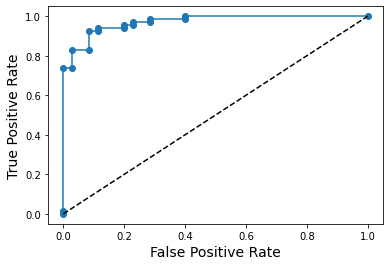

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

FPRs, TPRs, thresholds = roc_curve(y_test, p_hat_test)

plt.plot(FPRs, TPRs, marker='o')
plt.plot([0,1], [0,1], color='black', linestyle='--')
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.show()

In [27]:
ix = np.argwhere(TPRs >= 0.99).flatten()

In [29]:
thresholds[17]

1.2736944844741694e-12